# Model evaluation and selection continued

## Block I: Hypothesis testing
I.1 The basic ideas<br>
I.2 The $\chi^2$-test<br>
I.3 Conceptual problems of hypothesis testing<br>
I.4 Practical problems<br>
I.5 Gliese 581: A real story how hypothesis testing failed

## Block II: Bayesian evidence
II.1 Bayesian evidence and Bayes factors<br>
II.2 Computing Bayesian evidence in practice<br>
II.3 Consistency of Bayesian evidence

## Block I: Hypothesis testing

### I.1 The basic ideas
* How can we assess whether some model (a.k.a. hypothesis) fits a given data set, such that we can tolerate the model or have to reject it?
* Hypothesis testing adopts the following approach:<br>
(1) You fit your model to the given data, to obtain the best-fit parameters.<br>
(2) You assess the residuals of the data and the best-fit model.
* Only a single hypothesis is tested at a time, the <font color='red'>null hypothesis</font>, which is either rejected or not (absolute assessment). Hypothesis testing is not comparing different models (relative assessment). In particular, you can test a single model without having to specify any alternative.
* Since Frequentists refuse priors, distributions over parameters are inaccessible to them. Instead, Frequentists can only work with distributions over data (<font color='red'>likelihood function</font>).
* All hypothesis testing looks at the residuals of the best-fit and asks how likely it is (<font color='red'>p-value</font>) that we would obtain such residuals or even more extreme, if the model was actually true.
* Since data can have different noise distributions and models can be even more exotic, there is a seemingly infinite number of tests from which one has to pick "the right one" that fits the situation at hand. Some examples are: $\chi^2$-test, false-alarm probabilities, $t$-test, $F$-test, KS-test, $U$-test, signed-rank test, etc.
* Example: You have repeatedly measured the radial velocity of some star at different times. You want to know if the star is orbited by exoplanets or not, and if so, by how many exoplanets.<br>
First, you test if the star is alone, i.e., the radial velocities all come from some constant plus noise.<br>
If that is rejected, you check if constant plus one Kepler orbit fits the data.<br>
If that is rejected, you check if constant plus two Kepler orbits fits the data.<br>
If that is rejected, you check if constant plus three Kepler orbits fits the data.<br>
etc.

### I.2 The $\chi^2$-test
* For a linear model with Gaussian measurement errors, you can obtain an analytic fit result. For that, you can compute the $\chi^2$ value of the best-fit parameters.
* If your linear model was actually true, then the value of $\chi^2$ would only include random noise (but no systematic errors between data and model). This is given by the <font color='red'>$\chi^2$ distribution</font>:
\begin{equation}
P(\chi^2|k)=\frac{1}{2^{k/2}\Gamma(k/2)} \left(\chi^2\right)^{k/2-1}e^{-\chi^2/2}
\end{equation}
Here $k$ denotes the <font color='red'>number of degrees of freedom</font> and $\Gamma$ is the gamma function.
* The expectation value of $\chi^2$ under the $\chi^2$ distribution happens to equal the number of degrees of freedom:
\begin{equation}
\langle\chi^2\rangle = \int_0^\infty \chi^2 P(\chi^2|k)d\chi^2=k
\end{equation}
This is the origin of <font color='red'>reduced $\chi^2$</font>, $\chi^2_\textrm{red}=\frac{\chi^2}{k}$, and why a value of reduced $\chi^2$ of 1 is considered to indicate a model matching the data.
* The variance of $\chi^2$ is $2k$ and the variance of reduced $\chi^2$ is 2. This is another argument against aiming for $\chi^2_\textrm{red}=1$.
* Warning: Reduced $\chi^2$ can only be used if the data have Gaussian noise <i>and</i> the model is linear! If the noise is non-Gaussian, $\chi^2$ cannot be used at all. If the noise is Gaussian but the model is nonlinear, we may still use $\chi^2$, but it will <i>not</i> follow the $\chi^2$ distribution anymore! As a matter of fact, <font color='red'>the concept of degrees of freedom cannot be mathematically defined for nonlinear models</font>. (Remember the model $f(x)=a\cos(kx+\phi)$, which has only 3 parameters but infinite complexity.)
* Let us have a model with 4 fit parameters and given training data with 24 examples. The degrees of freedom are $k=24-4=20$. Let his model achieve a best-fit $\chi^2$ value of 30.0. If this model was actually true, what is the chance of getting such a value or worse? We need to integrate the upper tail of the distribution to obtain the $p$-value:
\begin{equation}
p=\int_{30.0}^\infty P(\chi^2|k=20)d\chi^2
\end{equation}
<img src="chi2_distribution-p-value.png" alt="Drawing" style="width: 600px;"/>

In [1]:
# coding: utf-8
from __future__ import division, print_function, unicode_literals

In [6]:
from scipy.stats import chi2 as chi2dist
# Define number of degrees of freedom.
ndof = 20
# Compute p-value via the CDF (p=1-CDF).
print(1.0-chi2dist.cdf(30.0, ndof))

0.0698536606994


* If a $p$-value is very small, then it is very unlikely that if this model was true it could create such a "bad" fit. In such a case, the model is rejected.
* Very often, a fixed threshold of 5% is adopted. If the $p$-value is lower than this, the model is rejected.
<img src="p-value-cartoon.png" alt="Drawing" style="width: 600px;"/>

### I.3 Conceptual problems of hypothesis testing
* Hypothesis testing (no matter what flavour) suffers from several conceptual problems. You need to be aware of these in order to avoid misleading conclusions (e.g., incorrect estimate of number of exoplanets).
* The very idea of an absolute assessment "does the model fit the data?" is questionable.
* How can you reject a hypothesis if you have not formulated an alternative?
* While a low $p$-value may lead to a rejection, what happens if the $p$-value is not low enough? Failing to reject a model is not the same as accepting it.
* Why should unobserved data "more extreme" than the observed value be relevant?
* Rejecting a model because the data are "unlikely" in some sense is odd, since we <i>did</i> get this data. The data could be "equally unlikely" under all plausible models.
* $p$-values depend on the best-fit parameters, some of which may be necessary to evalute the model but otherwise of no physical interest. More parameters can lead to lower residuals and thus to false conclusions.

### I.4 Practical problems
* As mentioned before, a threshold of 5% is often adopted to reject model if the $p$-value is too small.
* However, what if the $p$-value would shrink as we gathered more data? Then the correct model would eventually get $p<0.05$ if we only collect enough data.
* Example: Let us toss a coin. First, we obtain 4 heads out of 10 tosses. Afterwards, we try again and obtain 8 heads out of 20 tosses. The null hypothesis is "the coin is fair", i.e., the fraction of heads is $f=0.5$. In this case, the model "fair coin" has no fit parameters. For $h$ heads out of $n$ tosses, this model's likelihood is given by:
\begin{equation}
P(h|n,f=0.5)=\frac{h!}{n!(n-h)!}f^h(1-f)^{n-h}
=\frac{h!}{n!(n-h)!}\left(\frac{1}{2}\right)^h\left(1-\frac{1}{2}\right)^{n-h}
=\frac{h!}{n!(n-h)!}\frac{1}{2^n}
\end{equation}
Since both observed fractions are below 50%, the $p$-value is the "integral" over the lower tail of the likelihood ("more extreme data"):
\begin{equation}
p=\sum_{i=0}^h P(i|n,f=0.5)
=\frac{1}{2^n}\sum_{i=0}^h \frac{i!}{n!(n-i)!}
\end{equation}

In [3]:
import math
# Compute p for given data.
def getP(h, n):
    p        = 0.0
    lognfact = math.log(math.factorial(n))  # Compute log(n!) only once.
    for i in range(h+1):
        # Careful with the numerics of the factorials.
        p = p + math.exp(math.log(math.factorial(i)) - lognfact - math.log(math.factorial(n-i)))
    return p*math.pow(2.0,-n)
# Compute p value for "fair coin" given 4 heads out of 10 tosses.
print(getP(4, 10))
# Compute p value for "fair coin" given 8 heads out of 20 tosses.
print(getP(8, 20))

9.30502055699e-12
3.33163692864e-29


* Even for the true model, the <font color='red'>$p$-value decreases as the number of data increases</font>.
* If you adopt a fixed threshold of, say, 5%, and then you collect more and more data ... your $p$-value will decrease and you will systematically favour ever more complex models.

* Most $p$-values rely on the number of degrees of freedom ($\chi^2$-test, $F$-test, Student's $t$-test, etc.) which only exists for linear models with Gaussian noise.
* $p$-values are <font color='red'>inconsistent estimators</font>, i.e., as the number of training data increases, they do <i>not</i> converge to the "truth". This is particularly bad for <font color='red'>nested models</font>, e.g., multiple planetary orbits in radial-velocity measurements.
* Let us illustrate this with a simple simulation:<br>
The truth is a constant model, $y=0$, in the range $x\in[-10,10]$.<br>
Gaussian noise with $\sigma=1$ is added (this allows us to simply use the OLS solution).<br>
Fit $f(x)=a_0+a_1 x$ to the data via analytic $\chi^2$ minimisation. Use the $\chi^2$-test to assess the model.<br>
Investigate how the $\chi^2$-test performs as we get more training data.

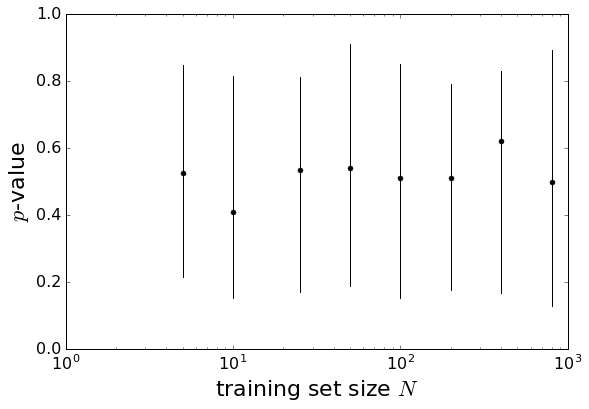

In [7]:
import numpy
from matplotlib import use
use('Qt5Agg')
import matplotlib.pyplot as plt
%matplotlib inline 
# Use scipy's Cholesky decomposition for matrix inversion.
from scipy.linalg import cho_factor, cho_solve
# Reset the RNG.
numpy.random.seed(1)
# Try for various sizes of training samples.
TrainSetSize = [5,10,25,50,100,200,400,800]
PValueMed    = []
PValueLower  = []
PValueUpper  = []
Nsimu        = 100
for N in TrainSetSize:
    # Array for holding results of all simulations.
    RawPValues = numpy.empty(Nsimu)
    for s in range(Nsimu):
        # Draw x from uniform interval -10,10.
        X = numpy.random.uniform(-10, 10, N)
        # Create Y=0 plus Gaussian random noise.
        Y = 0.0 + numpy.random.normal(0.0, 1.0, N)
        # Build design matrix.
        DesignT    = numpy.empty([2,N])
        DesignT[0] = 1.0
        DesignT[1] = X
        Design     = DesignT.T
        # Get coefficients using Cholesky decomposition.
        DtD      = numpy.dot(DesignT, Design)
        DtY      = numpy.dot(DesignT, Y)
        cholesky = cho_factor(DtD)
        theta    = cho_solve(cholesky, DtY)
        # Compute predictions of best-fit model and evaluate chi-2.
        prediction = numpy.dot(Design, theta)
        residuals  = Y - prediction
        chi2       = numpy.dot(residuals,residuals)
        # Compute p-value via the CDF (p=1-CDF).
        ndof          = N - 2
        RawPValues[s] = 1.0 - chi2dist.cdf(chi2, ndof)
    # Sort the p-values.
    RawPValues = sorted(RawPValues)
    # Get median, lower 16% and upper 84% levels.
    PValueMed.append(numpy.median(RawPValues))
    PValueLower.append(RawPValues[int(round(0.16*(Nsimu-1.0)))])
    PValueUpper.append(RawPValues[int(round(0.84*(Nsimu-1.0)))])
# Plot how p-value evolves as N increases.
plt.figure(1, figsize=(9,6))
plt.plot(TrainSetSize, PValueMed, 'o', ms=5, color='black')
for n in range(len(TrainSetSize)):
    plt.plot([TrainSetSize[n], TrainSetSize[n]], [PValueLower[n],PValueUpper[n]], '-', lw=1, color='black')
plt.xscale('log')
plt.ylim(0,1)  # p-value is a probability in range [0,1]
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(r'training set size $N$', fontsize=22)
plt.ylabel(r'$p$-value', fontsize=22)

* As we increase the amount of training data, the $\chi^2$-test is incapable of rejecting the incorrect model $f(x)=a_0+a_1 x$, which contains the "true" model $f(x)=0$ as a nested model.

* Actually, for nested models, the $\chi^2$ test is not the right test. We should rather use the $F$-test. There is a special test for every special situation (<font color='red'>hypothesis testing lacks generality</font>).
* Let model 1 have $p_1$ parameters and achieve $\chi^2_1$. Moreover, let model 1 be nested inside model 2, which has $p_2>p_1$ parameters and which achieves $\chi_2^2$. We can then compute the $F$ statistics for $N$ given training examples:
\begin{equation}
F=\frac{\left(\frac{\chi^2_1 - \chi^2_2 }{p_2 - p_1}\right)}{\left(\frac{\chi^2_2}{N - p_2}\right)}
\end{equation}
This quantity $F$ follows the <font color='red'>$F$-distribution</font> with degrees of freedom $(p_2-p_1,N-p_2)$. We integrate the upper tail of the $F$-distribution.

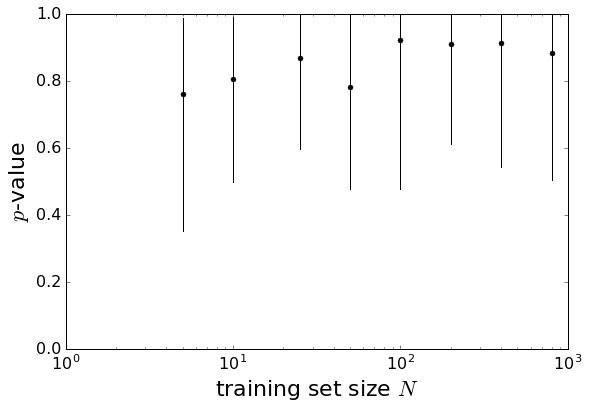

In [8]:
from scipy.stats import f as Fdist
# Use scipy's Cholesky decomposition for matrix inversion.
from scipy.linalg import cho_factor, cho_solve
# Reset the RNG to make sure we are actually creating the same test data again.
numpy.random.seed(1)
# Try for various sizes of training samples.
TrainSetSize = [5,10,25,50,100,200,400,800]
PValueMed    = []
PValueLower  = []
PValueUpper  = []
Nsimu        = 100
for N in TrainSetSize:
    # Array for holding results of all simulations.
    RawPValues = numpy.empty(Nsimu)
    for s in range(Nsimu):
        # Draw x from uniform interval -10,10.
        X = numpy.random.uniform(-10, 10, N)
        # Create Y=0 plus Gaussian random noise.
        Y = 0.0 + numpy.random.normal(0.0, 1.0, N)
        # First, fit a 0-th order polynomial.
        # Build design matrix.
        DesignT    = numpy.empty([1,N])
        DesignT[0] = 1.0
        Design     = DesignT.T
        # Get coefficients using Cholesky decomposition.
        DtD      = numpy.dot(DesignT, Design)
        DtY      = numpy.dot(DesignT, Y)
        cholesky = cho_factor(DtD)
        theta    = cho_solve(cholesky, DtY)
        # Compute predictions of best-fit model and evaluate chi-2.
        prediction = numpy.dot(Design, theta)
        residuals  = Y - prediction
        chi2_1     = numpy.dot(residuals,residuals)
        # Second, fit a 1st-order polynomial.
        # Build design matrix.
        DesignT    = numpy.empty([2,N])
        DesignT[0] = 1.0
        DesignT[1] = X
        Design     = DesignT.T
        # Get coefficients using Cholesky decomposition.
        DtD      = numpy.dot(DesignT, Design)
        DtY      = numpy.dot(DesignT, Y)
        cholesky = cho_factor(DtD)
        theta    = cho_solve(cholesky, DtY)
        # Compute predictions of best-fit model and evaluate chi-2.
        prediction = numpy.dot(Design, theta)
        residuals  = Y - prediction
        chi2_2     = numpy.dot(residuals,residuals)
        # Compute value of F score.
        p1 = 1  # 0th-order polynomial has 1 fit parameter.
        p2 = 2  # 1st-order polynomial has 2 fit parameters.
        F  = ((chi2_1 - chi2_2)/(p2 - p1))/(chi2_2/(N-p2))
        # Compute p-value of F score under F-distribution.
        p2minp1       = p2 - p1
        Nminp2        = N - p2
        RawPValues[s] = 1.0 - Fdist.cdf(F, Nminp2, p2minp1)
    # Sort the p-values.
    RawPValues = sorted(RawPValues)
    # Get median, lower 16% and upper 84% levels.
    PValueMed.append(numpy.median(RawPValues))
    PValueLower.append(RawPValues[int(round(0.16*(Nsimu-1.0)))])
    PValueUpper.append(RawPValues[int(round(0.84*(Nsimu-1.0)))])
# Plot how p-value evolves as N increases.
plt.figure(2, figsize=(9,6))
plt.plot(TrainSetSize, PValueMed, 'o', ms=5, color='black')
for n in range(len(TrainSetSize)):
    plt.plot([TrainSetSize[n], TrainSetSize[n]], [PValueLower[n],PValueUpper[n]], '-', lw=1, color='black')
plt.xscale('log')
plt.ylim(0,1)  # p-value is a probability in range [0,1]
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(r'training set size $N$', fontsize=22)
plt.ylabel(r'$p$-value', fontsize=22)

### I.5 Gliese 581: A real story how hypothesis testing failed
* In 2010, results were published that the star Gliese 581 had 6 exoplanets, whereof one was nearly the mass of Earth and within the habitable zone of that star. This caused quite a stir in the community as well as the general public.
* The group used the $\chi^2$-test and false-alarm probabilities. However, using the same data, a Bayesian competitor group only found evidence for 4 exoplanets. Years later, Gliese 581 was found to exhibit star spots. One of the 6 planets was disclaimed and another one is under serious debate. What happened?
* First, a planetary orbit is a badly nonlinear model. Therefore, the concept of degrees of freedom is undefinied such that the $\chi^2$ distribution does not apply and the $\chi^2$-test cannot be used.
* Second, a single Kepler orbit has 4 free parameters (period, semi-major axis, eccentricity, perihelion angle). A model comprised of a constant proper motion of the entire system plus 6 exoplanets thus has a total of $1+6\cdot 4=25$ parameters. Since the Kepler orbit is of the $\cos$-form, we know it has high complexity, i.e., there certainly was some overfitting going on, which lead to artificially low residuals.
* Third, six exoplanet orbits form a nested model, which is problematic for $p$-values.
* Fourth, no alternative model had been formulated. Had the model "4 exoplanets plus star spots" been considered, it may have outperformed the "6 exoplanets".
* Fifth, the group had doubled the amount of data by combining observations from two different instruments. Having more data leads to lower $p$-values. Since they adopted a fixed threshold of 5%, this mislead them to only accept overly complex models.
* Hypothesis testing failed in this case because it was incorrectly used and the group was unaware of the pitfals. We cannot blame hypothesis testing itself for that. <font color='red'>You can use hypothesis testing carefully, if you know what you are doing!</font>

## Block II: Bayesian evidence

### II.1 Bayesian evidence and Bayes factors
* Let some data $D$ be given and we have a model $M$. We want to know what is the probability of the model given the data $P(M|D)$. Using Bayes' theorem:
\begin{equation}
P(M|D) = \frac{P(M)P(D|M)}{P(D)}
\end{equation}
$P(M|D)$ plays the role of a "model posterior".<br>
$P(M)$ is a model prior.<br>
$P(D|M)$ is the <font color='red'>Bayesian evidence</font>.<br>
$P(D)$ is the likelihood of the data irrespective of any model.
* Unfortunately, we cannot get $P(D)$ which would require us to consider <i>every</i> possible model. Instead, we take <i>two models</i> $M_1$ and $M_2$ and take their posterior odds-ratio:
\begin{equation}
\frac{P(M_1|D)}{P(M_2|D)} = \frac{P(M_1)P(D|M_1)}{P(M_2)P(D|M_2)}
\end{equation}
Note that $P(D)$ has cancelled out.
* If we consider all models to be equally likely a priori (which we do not have to do), then $P(M_1)=P(M_2)$ and we have:
\begin{equation}
\frac{P(M_1|D)}{P(M_2|D)} = \frac{P(D|M_1)}{P(D|M_2)}
\end{equation}
* The evidence ratio $\frac{P(D|M_1)}{P(D|M_2)}$ is called the <font color='red'>Bayes factor</font>.

* Computing a Bayes factor always follows the same procedure, whereas hypothesis testing requires us to identify the correct recipe.
* Bayes factors draw a <i>comparison</i> of one model vs. another model (relative assessment). Hypothesis testing attempts to assess a model without regard to any other model.
* If $\frac{P(D|M_1)}{P(D|M_2)}=10$ then the data $D$ are ten times more likely to come from model $M_1$ than from $M_2$. Under flat model priors, this implies that model $M_1$ is ten times more probable given the data than $M_2$.
* Terminology and thresholds vary, but some rough guidelines are:<br>
$\frac{P(D|M_1)}{P(D|M_2)}=1-3$ ... "not worth more than a bare mention"<br>
$\frac{P(D|M_1)}{P(D|M_2)}=3-10$ ... "$M_1$ provides some evidence against $M_2$"<br>
$\frac{P(D|M_1)}{P(D|M_3)}=10-100$ ... "$M_1$ provides strong evidence against $M_2$"<br>
$\frac{P(D|M_1)}{P(D|M_2)}>100$ ... "$M_1$ provides decisive evidence against $M_2$"
* Note that $\frac{P(D|M_1)}{P(D|M_2)}>1$ provides evidence <i>against</i> $M_2$. It does <i>not</i> provide evidence in favour of $M_1$. There could be a third model which we have not tested that would outperform $M_1$.

### II.2 Computing Bayesian evidence in practice
* For given data $D$ and a model $M$ which has parameters $\theta$, we evaluate the Bayesian evidence through marginalisation:
\begin{equation}
P(D|M)=\int P(D,\theta|M)d\theta
=\int P(D|\theta,M)\,P(\theta|M)d\theta
\end{equation}
In simple words: We "sum up" the likelihood of the data for all possible parameter values.
* Obviously, the <font color='red'>Bayesian evidence depends on the prior</font>.
* The model that has the higher "average likelihood" is the better one. But due to the integral, any extra parameter introduces extra volume over which you are averaging.
<img src="interpret-evidence-goodness-of-fit.png" alt="Drawing" style="width: 600px;"/>

* In some rare examples, the Bayesian evidence can be computed analytically (for well chosen priors).
* Let $M$ be a linear model with parameters $\vec\theta$ and design matrix $D$. Let us choose a conjugate prior, i.e., a Gaussian with mean $\vec\theta_0$ and covariance matrix $\Sigma_0$. If we introduce:
\begin{equation}
A = D^T\cdot\Sigma^{-1}\cdot D + \Sigma_0^{-1}
\end{equation}
\begin{equation}
\vec b = D^T\cdot\Sigma^{-1}\cdot\vec y + \Sigma_0^{-1}\cdot\vec\theta_0
\end{equation}
\begin{equation}
c = \vec y^T\cdot\Sigma^{-1}\cdot\vec y + \vec\theta_0^T\cdot\Sigma_0^{-1}\cdot\vec\theta_0
\end{equation}
The Bayesian evidence then has an analytic solution to the integral:
\begin{equation}
P(D|M) = \frac{\exp\left[-\frac{1}{2}\left(c - \vec b^T\cdot A^{-1}\cdot\vec b\right)\right]}
{(2\pi)^{N/2}\sqrt{(\det\Sigma)(\det\Sigma_0)(\det A)}}
\end{equation}

* In general, the Bayesian evidence $P(D|M)=\int P(D|\theta,M)\,P(\theta|M)d\theta$ has no analytic solution for its integral and we need to compute it numerically.
* If we have only 1-2 fit parameters, we can do this, e.g., using the trapezoidal rule.
* If we have more parameters, we need Monte-Carlo integration.
* The simplest but least effective approach is to draw random samples from the prior $P(\theta|M)$ and evaluate the average likelihood:
\begin{equation}
P(D|M)\approx \frac{1}{S}\sum_{s=1}^S P(D|\theta_s,M) \qquad\textrm{where}\qquad \theta_s\sim P(\theta|M)
\end{equation}

In [16]:
# Estimate the Bayesian evidence with Monte-Carlo sampling.
# Reset random seed.
numpy.random.seed(1)
# Create some toy data: X in [-10, 10], Y=0 with Gaussian noise sigma=1.
N = 10
X = numpy.random.uniform(-10, 10, N)
Y = 0.0 + numpy.random.normal(0.0, 1.0, N)
# Compute average likelihood from Monte-Carlo sampling.
S             = 1000
Likelihood0th = numpy.empty(S)  # Store likelihoods for 0tu-order model
Likelihood1st = numpy.empty(S)  # Store likelihoods for 1st-order model
for s in range(S):
    # Draw parameters from prior
    a0,a1 = numpy.random.normal(0.0, 1.0, 2)
    # Compute chi2 for 0th-order model f(x)=a0.
    residual = Y - a0
    chi2     = numpy.dot(residual,residual)
    # Compute likelihood.
    Likelihood0th[s] = math.exp(-chi2/2.0)/math.pow(2.0*numpy.pi, N/2.0)
    # Compute chi2 for 1st-order model f(x)=a0 + a1*x.
    residual = Y - a0 - a1*X
    chi2     = numpy.dot(residual,residual)
    # Compute likelihood.
    Likelihood1st[s] = math.exp(-chi2/2.0)/math.pow(2.0*numpy.pi, N/2.0)
# Print evidence estimates and Bayes factor.
print("P(D|M_0) = {}".format(numpy.mean(Likelihood0th)))
print("P(D|M_1) = {}".format(numpy.mean(Likelihood1st)))
print("BF       = {}".format(numpy.mean(Likelihood0th)/numpy.mean(Likelihood1st)))

P(D|M_0) = 4.74572901116e-08
P(D|M_1) = 3.37524229657e-09
BF       = 14.0604098733


In [17]:
# Compute the Bayesian evidence analytically.
# Step 1: Compute the analytic evidence for M_1: f(x) = a_0.
# Build design matrix.
DesignT    = numpy.empty([1,N])
DesignT[0] = 1.0
Design     = DesignT.T
# Define matrix A, vector b and scalar c. Note that theta_0=0.
A = numpy.dot(DesignT, Design) + numpy.identity(1)
b = numpy.dot(DesignT, Y)
c = numpy.dot(Y, Y)
# Use a trick to get inverse matrix from more stable Cholesky decomposition.
cholesky = cho_factor(A)
Ainv     = cho_solve(cholesky, numpy.identity(1))
# Compute log-evidence of second model. Drop irrelevant normalisation constants.
detSigma  = 1.0
detSigma0 = 1.0
logEvi0   = -0.5*c + 0.5*numpy.dot(b, numpy.dot(Ainv, b))
logEvi0   = logEvi0 - 0.5*math.log(numpy.linalg.det(A)) - 0.5*math.log(detSigma) - 0.5*math.log(detSigma0)
evidence0 = math.exp(logEvi0 - 0.5*N*math.log(2.0*numpy.pi))
# Step 2: Compute the analytic evidence for M_2: f(x) = a_0+a_1*x.
# Build design matrix.
DesignT    = numpy.empty([2,N])
DesignT[0] = 1.0
DesignT[1] = X
Design     = DesignT.T
# Define matrix A, vector b and scalar c. Note that theta_0=0.
A = numpy.dot(DesignT, Design) + numpy.identity(2)
b = numpy.dot(DesignT, Y)
c = numpy.dot(Y, Y)
# Use a trick to get inverse matrix from more stable Cholesky decomposition.
cholesky = cho_factor(A)
Ainv     = cho_solve(cholesky, numpy.identity(2))
# Compute log-evidence of second model. Drop irrelevant normalisation constants.
logEvi1   = -0.5*c + 0.5*numpy.dot(b, numpy.dot(Ainv, b))
logEvi1   = logEvi1 - 0.5*math.log(numpy.linalg.det(A)) - 0.5*math.log(detSigma) - 0.5*math.log(detSigma0)
evidence1 = math.exp(logEvi1 - 0.5*N*math.log(2.0*numpy.pi))
# Print analytic evidence and Bayes factor.
print("P(D|M_0) = {}".format(evidence0))
print("P(D|M_1) = {}".format(evidence1))
print("BF       = {}".format(evidence0/evidence1))

P(D|M_0) = 4.83710018576e-08
P(D|M_1) = 3.63787272385e-09
BF       = 13.2965074727


* Ideally, you want to run an MCMC and use it to find the best-fit parameters <i>and</i> simultaneously get the Bayesian evidence. Let us write the inverse evidence:
\begin{equation}
\frac{1}{P(D|M)}=\frac{1}{P(D|M)}\underbrace{\int P(\theta|M)d\theta}_{=1\,\textrm{(prior norm)}}
\end{equation}
\begin{equation}
=\frac{1}{P(D|M)}\int \underbrace{\frac{P(D|M)\,P(\theta|D,M)}{P(D|\theta,M)}}_\textrm{Bayes' theorem}d\theta
\end{equation}
\begin{equation}
=\int \frac{P(\theta|D,M)}{P(D|\theta,M)}d\theta
\end{equation}
\begin{equation}
\frac{1}{P(D|M)}\approx\frac{1}{S}\sum_{s=1}^S\frac{1}{P(D|\theta_s,M)}
\qquad\textrm{where}\qquad
\theta_s\sim P(\theta|D,M)
\end{equation}
This is called the <font color='red'>harmonic mean estimator</font> (HME): We draw MCMC samples from the posterior $P(\theta|D,M)$ which we can use to estimate $\theta$ but from which can also estimate the <i>inverse</i> evidence by averaging the <i>inverse</i> likelihoods.
* Since the HME averages the <i>inverse</i> likelihoods, it is dominated by low-likelihood samples. It is numerically extremely unstable.

* Currently, there is no reliable method for running a <i>single</i> MCMC in order to estimate parameters and evidence at the same time.
* <font color='red'>Simulated annealing</font> runs multiple MCMC chains in parallel, which exchange samples in a non-trivial manner.
* The <font color='red'>cross-validation likelihood</font> runs multiple MCMC chains (one for every cross-validation subset) but without cross-talk.
* <font color='red'>Nested sampling</font> is less useful for parameter estimation but gives much better evidence estimates than plain Monte-Carlo sampling.
* <font color='red'>Multi-nested sampling</font> is currently the most efficient method to estimate Bayesian evidences (and parameter values) for models with many dimensions.

### II.3 Consistency of Bayesian evidence
* Bayes factors are consistent estimators, especially for nested models.

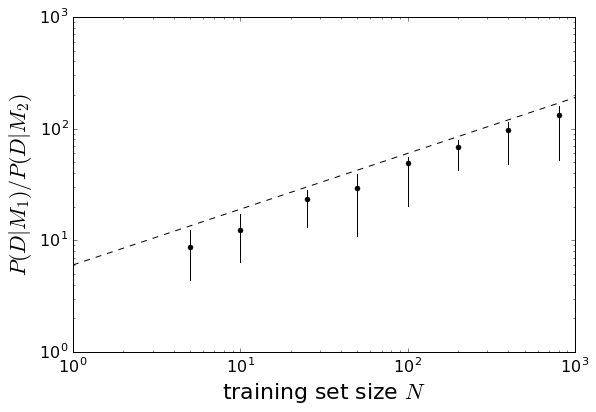

In [18]:
import numpy
from matplotlib import use
use('Qt5Agg')
import matplotlib.pyplot as plt
%matplotlib inline 
# Use scipy's Cholesky decomposition for matrix inversion.
from scipy.linalg import cho_factor, cho_solve
# Reset the RNG.
numpy.random.seed(1)
# Try for various sizes of training samples.
TrainSetSize = [5,10,25,50,100,200,400,800]
BfValueMed   = []
BfValueLower = []
BfValueUpper = []
Nsimu        = 100
for N in TrainSetSize:
    # Array for holding results of all simulations.
    RawBfValues = numpy.empty(Nsimu)
    for s in range(Nsimu):
        # Draw x from uniform interval -10,10.
        X = numpy.random.uniform(-10, 10, N)
        # Create Y=0 plus Gaussian random noise.
        Y = 0.0 + numpy.random.normal(0.0, 1.0, N)
        # Step 1: Compute the analytic evidence for M_1: f(x) = a_0.
        # Build design matrix.
        DesignT    = numpy.empty([1,N])
        DesignT[0] = 1.0
        Design     = DesignT.T
        # Define matrix A, vector b and scalar c. Note that theta_0=0.
        A = numpy.dot(DesignT, Design) + numpy.identity(1)
        b = numpy.dot(DesignT, Y)
        c = numpy.dot(Y, Y)
        # Use a trick to get inverse matrix from more stable Cholesky decomposition.
        cholesky = cho_factor(A)
        Ainv     = cho_solve(cholesky, numpy.identity(1))
        # Compute log-evidence of first model. Drop irrelevant normalisation constants.
        logEvi1 = -0.5*math.log(numpy.linalg.det(A)) - 0.5*c + 0.5*numpy.dot(b, numpy.dot(Ainv, b))
        # Step 2: Compute the analytic evidence for M_2: f(x) = a_0+a_1*x.
        # Build design matrix.
        DesignT    = numpy.empty([2,N])
        DesignT[0] = 1.0
        DesignT[1] = X
        Design     = DesignT.T
        # Define matrix A, vector b and scalar c. Note that theta_0=0.
        A = numpy.dot(DesignT, Design) + numpy.identity(2)
        b = numpy.dot(DesignT, Y)
        c = numpy.dot(Y, Y)
        # Use a trick to get inverse matrix from more stable Cholesky decomposition.
        cholesky = cho_factor(A)
        Ainv     = cho_solve(cholesky, numpy.identity(2))
        # Compute log-evidence of second model. Drop irrelevant normalisation constants.
        logEvi2 = -0.5*math.log(numpy.linalg.det(A)) - 0.5*c + 0.5*numpy.dot(b, numpy.dot(Ainv, b))
        # Write Bayes factor (do not forget to exponentiate log-evidences).
        RawBfValues[s] = math.exp(logEvi1 - logEvi2)
    # Sort the p-values.
    RawBfValues = sorted(RawBfValues)
    # Get median, lower 16% and upper 84% levels.
    BfValueMed.append(numpy.median(RawBfValues))
    BfValueLower.append(RawBfValues[int(round(0.16*(Nsimu-1.0)))])
    BfValueUpper.append(RawBfValues[int(round(0.84*(Nsimu-1.0)))])
# Plot how p-value evolves as N increases.
plt.figure(1, figsize=(9,6))
plt.plot(TrainSetSize, BfValueMed, 'o', ms=5, color='black')
for n in range(len(TrainSetSize)):
    plt.plot([TrainSetSize[n], TrainSetSize[n]], [BfValueLower[n],BfValueUpper[n]], '-', lw=1, color='black')
X = numpy.array([1,1000])
plt.plot(X, 6.0*numpy.sqrt(X), '--', lw=1, color='black')
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(r'training set size $N$', fontsize=22)
plt.ylabel(r'$P(D|M_1)/P(D|M_2)$', fontsize=22)